# Figure 4B-E
treatment: VNS (1), sham (2)

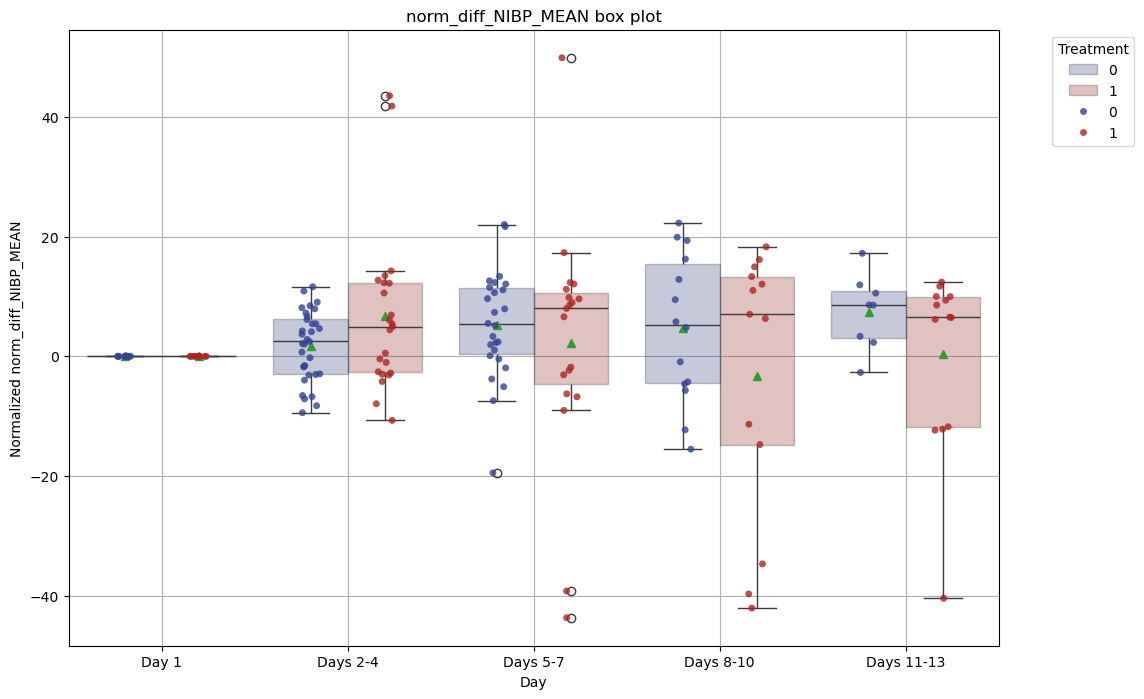

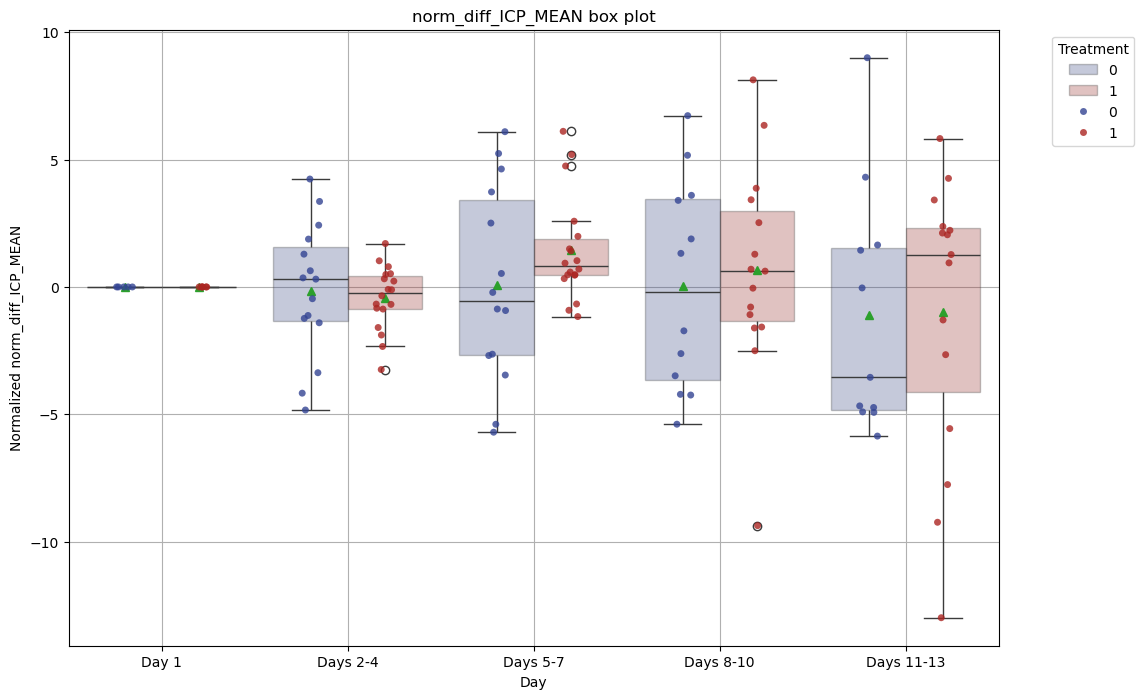

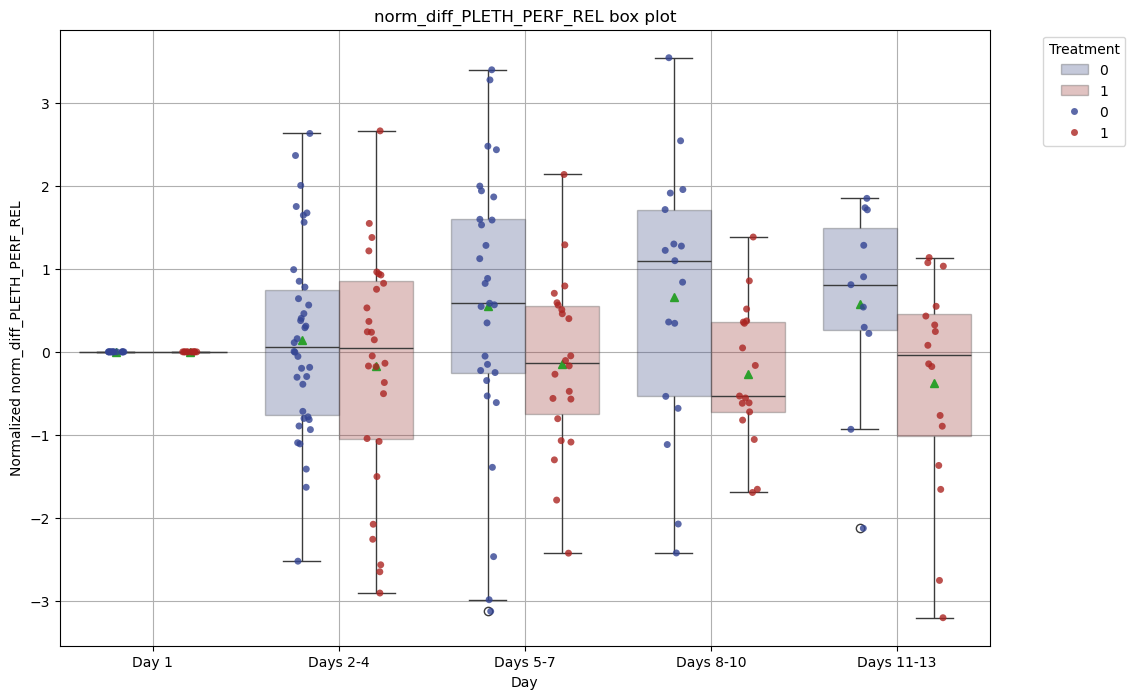

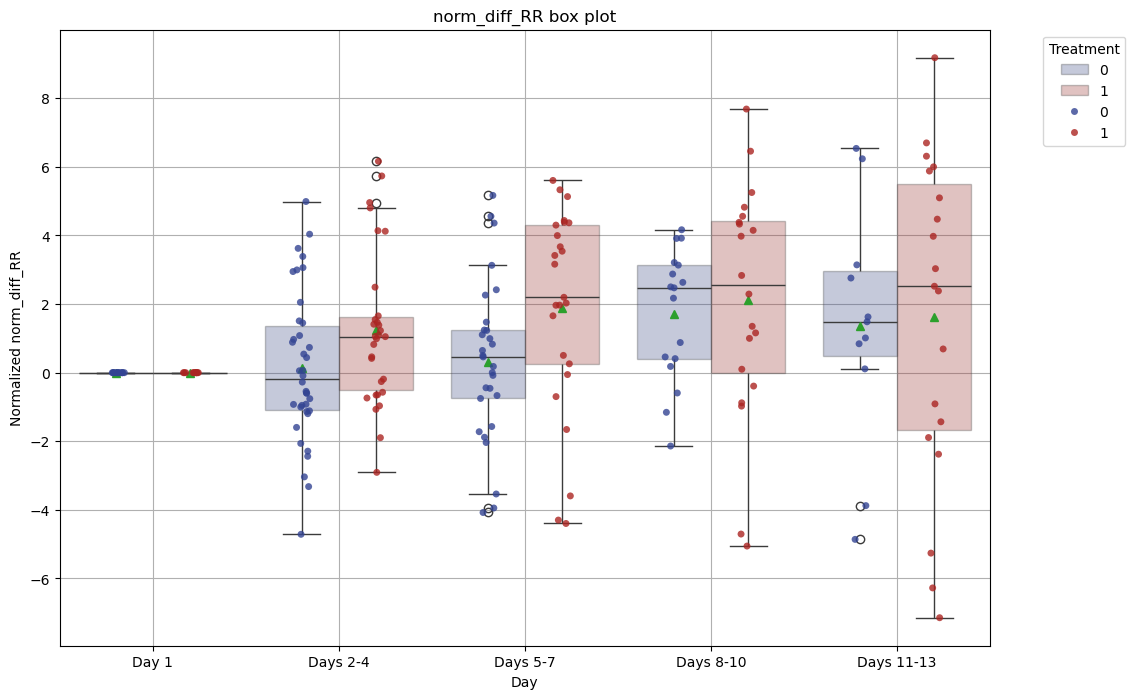

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def assign_3_day_bin(day):
    if day == 1:
        return 'Day 1'
    else:
        # Calculate the bin number (e.g., 2-4, 4-5, etc.)
        bin_num = ((day - 2) // 3) + 1
        # Calculate the start and end of the bin range
        start_day = 3 * bin_num - 1
        end_day = start_day + 2
        return f'Days {start_day}-{end_day}'

df_bp_sum = pd.read_csv('df_bp_sum.csv')        
treatment_color = "#AB2522"
non_treatment_color = "#334493"
hue_order = [0, 1]
palette = {0: non_treatment_color, 1: treatment_color} 

df2plot = df_bp_sum.copy()
df2plot = df2plot[(df2plot['research_day'] <=13) & (df2plot['research_day'] >=1)]
df2plot['day_bin'] = df2plot['research_day'].apply(assign_3_day_bin)
features_of_interest = ['norm_diff_NIBP_MEAN', 'norm_diff_ICP_MEAN', 'norm_diff_PLETH_PERF_REL', 'norm_diff_RR']
for feature in features_of_interest:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='day_bin', y=f'{feature}', hue='treatment', data=df2plot,
                palette=palette, showmeans=True, boxprops=dict(alpha=.3))
    sns.stripplot(x='day_bin', y=f'{feature}', hue='treatment', data=df2plot,
                  hue_order=hue_order, palette=palette, dodge=True, jitter=True, alpha=0.8)
    plt.title(f'{feature} box plot')
    plt.xlabel('Day')
    plt.ylabel('Normalized ' + feature)
    plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc=2)
    plt.grid(True)
    plt.show()



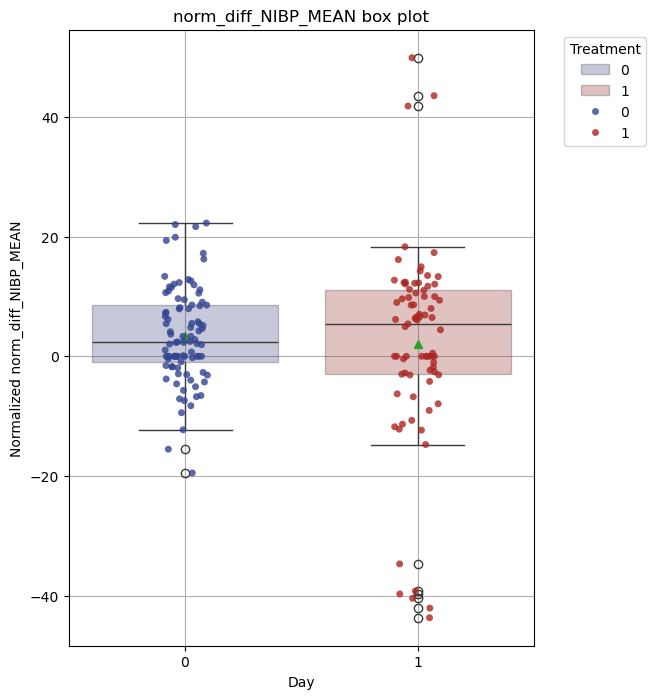

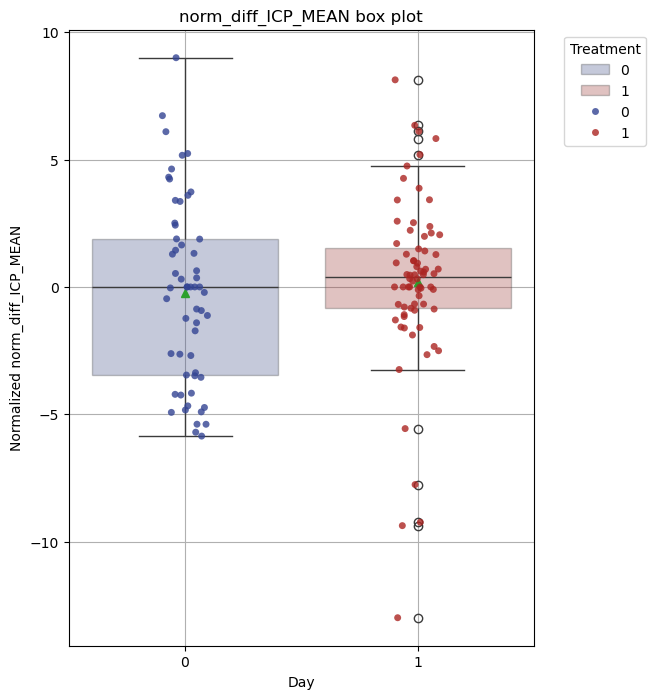

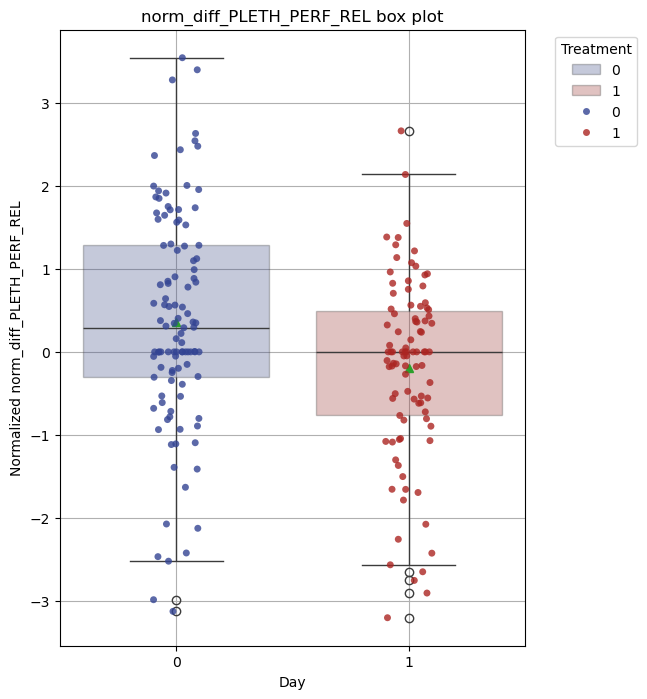

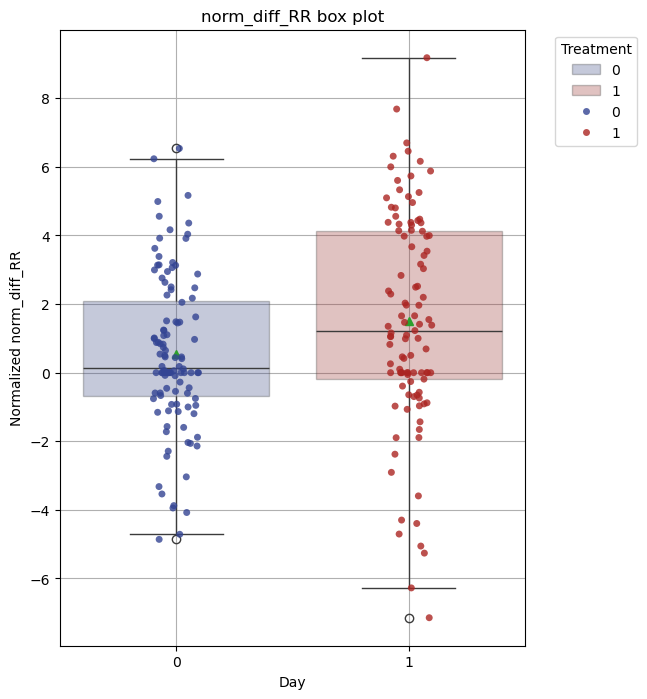

In [11]:
for feature in features_of_interest:
    plt.figure(figsize=(5, 8))
    sns.boxplot(x='treatment', y=f'{feature}', hue='treatment', data=df2plot,
                palette=palette, showmeans=True, boxprops=dict(alpha=.3))
    sns.stripplot(x='treatment', y=f'{feature}', hue='treatment', data=df2plot,
                  hue_order=hue_order, palette=palette,  jitter=True, alpha=0.8)
    plt.title(f'{feature} box plot')
    plt.xlabel('Day')
    plt.ylabel('Normalized ' + feature)
    plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc=2)
    plt.grid(True)
    plt.show()